#  Zahra Khtibi - 610398119 - Final Project
# Zahrakhatibiiii@gmail.com

## Import some important libraries

In [1183]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import math
import cvxpy as cp
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import binom_test

## Read data

In [1214]:
khodro_df = pd.read_csv("Iran.Khodro.csv") 
khasapa_df = pd.read_csv("S_Saipa.csv") 
khagostar_df = pd.read_csv("Iran.Kh..Inv..csv")
khansir_df = pd.read_csv("Nasir.Machine.csv")
khavar_df = pd.read_csv("S_IranKhodroDiesel.csv")
khazin_df = pd.read_csv("Saipa.Azin.csv")
khazar_df = pd.read_csv("Zar.Spring.csv")
khmohareke_df = pd.read_csv("Nirou.Moharreke.csv")
khkomak_df = pd.read_csv("Indamin.csv")
khring_df = pd.read_csv("Mashad.Wheel.csv")

## Read market data and calculate Daily Return of Market

In [1215]:
market_index_df = pd.read_csv("index.csv")
market_index_df = market_index_df[0:640]
del market_index_df['Unnamed: 2']
market_index_df["DailyReturn"] = round((market_index_df[0:639].Index.reset_index(drop=True) -
                                        market_index_df[1:640].Index.reset_index(drop=True))/
                                       market_index_df[1:640].Index.reset_index(drop=True)*100,2)
market_index_df.head()

,date,Index,DailyReturn
0,20230131.0,1556551.9,1.10
1,20230130.0,1539679.6,-0.16
2,20230129.0,1542190.7,-3.62
3,20230128.0,1600083.7,-0.74
4,20230125.0,1611955.9,-2.07


#  ***************Solution of Question 1*******************

### Creating a list that includes shares data fram

In [1216]:
list_of_df = [khodro_df, khasapa_df, khagostar_df, khansir_df, khavar_df,
              khazin_df, khazar_df, khmohareke_df, khkomak_df, khring_df]

### Creating a list that includes name od the shares

In [1217]:
name_of_share = ["khodro", "khasapa", "khagostar", "khansir", "khavar",
              "khazin", "khazar", "khmohareke", "khkomak", "khring"]

### Cleaning the data and set name for columns and remove extra columns

In [1218]:
def clean_df(d):   
    d = pd.DataFrame(d[0:640])
    d.columns = ["name", "date", "FirstPrice","MaxPrice","MinPrice",
                 "ClosePrice","Value", "Size","Count","D","YesterdayPrice","LastTrad"]
    del d["name"]
    del d["D"]
    return d

In [1219]:
for i in range(10):
    list_of_df[i] = clean_df(list_of_df[i])

## Calculating of daily return for asset

In [1220]:
def calculate_daily_return(d):
    d['DailyReturn'] = round((d[0:639].ClosePrice.reset_index(drop=True) - d[1:640].ClosePrice.reset_index(drop=True)) 
                     / d[1:640].ClosePrice.reset_index(drop=True) * 100,2)
    for i in range(640):
        if d['DailyReturn'][i] >= 15 or d['DailyReturn'][i] <= -15 :
            d.loc[i, 'DailyReturn' ] = round((d['ClosePrice'][i] - d['FirstPrice'][i])/(d['FirstPrice'][i])*100,2)
            
    return d

In [1221]:
for i in range(10):
    list_of_df[i] = calculate_daily_return(list_of_df[i])

In [1222]:
def calculate_return_mean(d):
    return round(d['DailyReturn'].mean(),2)

In [1223]:
def calculate_return_std(d):
    return round(d['DailyReturn'].std(),2)

## Calculating mean of each asset

In [1224]:
list_of_mean = []
for i in range(10):
    list_of_mean.append(calculate_return_mean(list_of_df[i]))
    
table_of_mean = [['Stock Name','mean of daily return']]
for i in range(10):
    table_of_mean.append([name_of_share[i] ,list_of_mean[i]])
print(tabulate(table_of_mean))

----------  --------------------
Stock Name  mean of daily return
khodro      0.12
khasapa     0.1
khagostar   0.03
khansir     0.38
khavar      0.4
khazin      -0.05
khazar      0.24
khmohareke  -0.01
khkomak     0.09
khring      -0.01
----------  --------------------


## Calculating std of each asset

In [1225]:
list_of_std = []
for i in range(10):
    list_of_std.append(calculate_return_std(list_of_df[i]))
table_of_std = [['Stock Name','std of daily return']]
for i in range(10):
    table_of_std.append([name_of_share[i] ,list_of_std[i]])
print(tabulate(table_of_std))

----------  -------------------
Stock Name  std of daily return
khodro      3.07
khasapa     3.09
khagostar   3.33
khansir     3.18
khavar      2.64
khazin      2.89
khazar      3.24
khmohareke  3.11
khkomak     2.9
khring      3.04
----------  -------------------


In [1226]:
color_list = ['#0A0A0A', '#CD1076' ,'#CD5B45','#483D8B','#CD2626','#27408B','#008B8B','#FF6103','#00B2EE','#9A32CD']

## Plot of Daily Return and Risk (std)

Text(0.5, 1.0, 'STD and Mean plot')

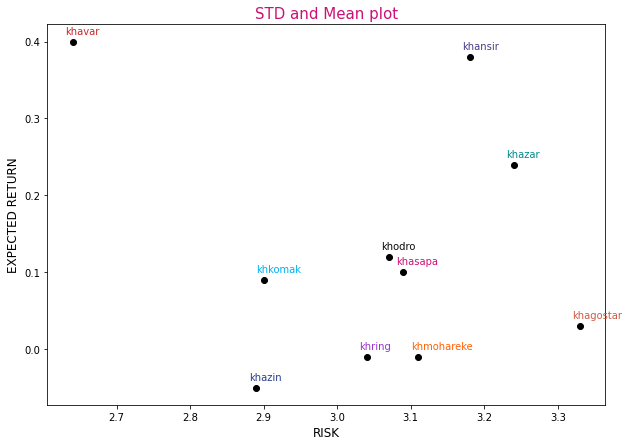

In [1227]:
plt.figure(figsize=(10,7))
plt.plot(list_of_std,list_of_mean,'o', color = 'black')
for i in range(10):
    plt.text(list_of_std[i]-0.01,list_of_mean[i]+0.01,name_of_share[i],color = color_list[i])
plt.xlabel("RISK", size = 12)
plt.ylabel("EXPECTED RETURN", size = 12)
plt.title("STD and Mean plot", size = 15 , color = color_list[1])

## Calculating monthly returns of asset
#### If we have outlier, we will change it 

In [1228]:
list_of_monthly_return = []
for d in list_of_df:
    Monthly_Returns = [-1 for i in range(30)] 
    for i in range (0,620,22):
        j = i//22
        Monthly_Returns[j] = round((d["ClosePrice"][i]-d["ClosePrice"][i+22])/d["ClosePrice"][i+22] * 100,2)
        if  Monthly_Returns[j] >= 70:
            Monthly_Returns[j] = 70
        elif Monthly_Returns[j] <-70:
            Monthly_Returns[j] = -70
    Monthly_Returns = Monthly_Returns[::-1]
    list_of_monthly_return.append(Monthly_Returns)

## Creating a data fram of monthly returns

In [1236]:
list_of_monthly_market_return = [-1 for i in range(30)] 
for i in range(0,620,22):
    j = i//22
    list_of_monthly_market_return[j] = round((market_index_df["Index"][i]-market_index_df["Index"][i+22])/market_index_df['Index'][i+22] * 100,2)
list_of_monthly_market_return = list_of_monthly_market_return[::-1]

In [1237]:
monthly_return_df = pd.DataFrame()
for i in range(10):
     monthly_return_df[name_of_share[i]] =  list_of_monthly_return[i]
monthly_return_df.head(10)

,khodro,khasapa,khagostar,khansir,khavar,khazin,khazar,khmohareke,khkomak,khring
0,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
1,0.32,-16.13,20.83,12.71,-29.22,-7.32,8.50,70.00,-1.49,19.32
2,-70.00,-44.29,70.00,11.96,6.37,43.34,22.31,-31.46,70.00,-15.35
3,70.00,70.00,-37.52,48.01,35.02,-18.04,13.85,-41.12,70.00,-15.09
4,-32.67,-19.67,-40.08,-2.93,15.21,-22.19,19.27,-32.97,-27.04,-19.24
5,-27.09,-34.11,-29.14,70.00,0.47,-13.60,2.61,-19.20,-7.80,47.99
6,6.76,-3.98,54.83,45.53,7.27,-20.06,-30.91,-14.29,-5.29,67.22
7,28.80,43.32,-32.19,-14.73,70.00,12.02,-0.95,9.03,-17.37,7.55
8,-32.43,-27.97,0.89,-6.00,-0.99,-29.70,70.00,-25.00,-19.46,-32.68
9,5.09,16.07,-16.76,-4.44,70.00,6.19,70.00,-6.29,-18.22,-4.97


# Plot of monthly returns of shares, as you see, are mostly correlated
## This asset divide to two groups:
### One group with positive correlation for example kh-ring and kh-gostar
### One group with negative correlation for example khansir and kh-gostar

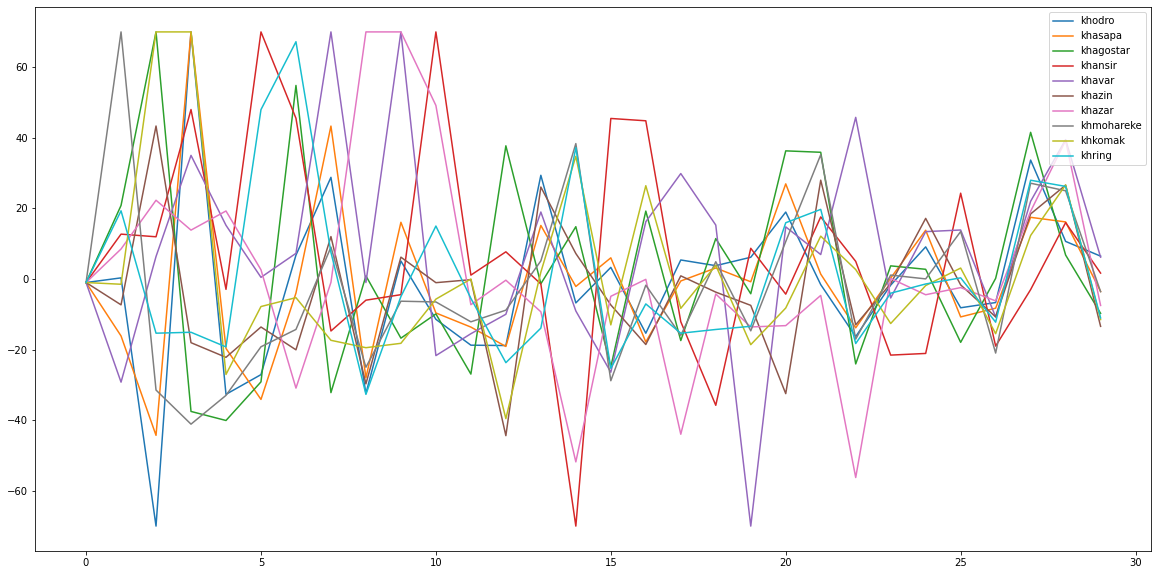

In [1235]:
plt.figure(figsize=(20, 10))
for i in range(10):
    plt.plot(list_of_monthly_return[i],label=name_of_share[i])
    leg = plt.legend(loc='upper right')

## Caculating of Correlation matrix

In [844]:
monthly_return_df.corr()

,khodro,khasapa,khagostar,khansir,khavar,khazin,khazar,khmohareke,khkomak,kharing
khodro,1.000000,0.927819,-0.205269,-0.025525,0.285435,0.021719,-0.113398,0.207953,0.094593,0.144868
khasapa,0.927819,1.000000,-0.243149,-0.102255,0.435830,0.104348,-0.016869,0.094647,0.182840,0.049290
khagostar,-0.205269,-0.243149,1.000000,-0.092576,-0.176765,0.183397,-0.033947,0.343714,0.251475,0.328343
khansir,-0.025525,-0.102255,-0.092576,1.000000,-0.126990,-0.177034,0.255269,-0.292185,0.106371,0.195279
khavar,0.285435,0.435830,-0.176765,-0.126990,1.000000,0.215161,0.122143,-0.023307,0.172595,0.023865
khazin,0.021719,0.104348,0.183397,-0.177034,0.215161,1.000000,0.077765,0.310973,0.472789,0.164199
khazar,-0.113398,-0.016869,-0.033947,0.255269,0.122143,0.077765,1.000000,-0.097753,-0.028633,-0.149178
khmohareke,0.207953,0.094647,0.343714,-0.292185,-0.023307,0.310973,-0.097753,1.000000,0.036120,0.480174
khkomak,0.094593,0.182840,0.251475,0.106371,0.172595,0.472789,-0.028633,0.036120,1.000000,0.136916
kharing,0.144868,0.049290,0.328343,0.195279,0.023865,0.164199,-0.149178,0.480174,0.136916,1.000000


## Correlation Heatmap Matrix

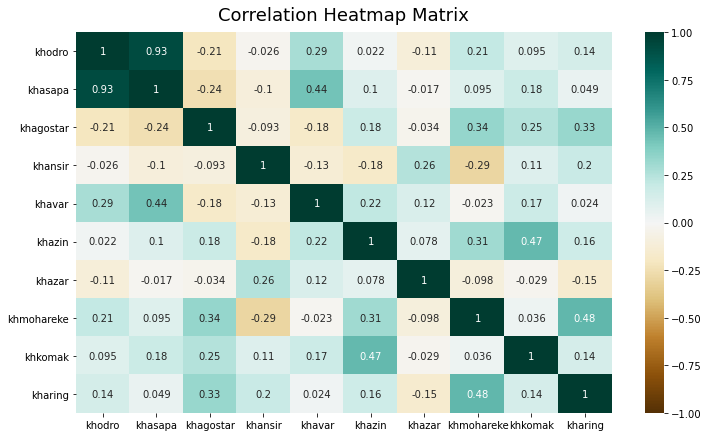

In [845]:
plt.figure(figsize=(12, 7))
heatmap = sns.heatmap(monthly_return_df.corr(),vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap Matrix', fontdict={'fontsize':18}, pad=12);

#  ***************Solution of Question 2*******************

## Plot of Monthly Return and Risk (std)

Text(0.5, 1.0, 'std and Mean plot')

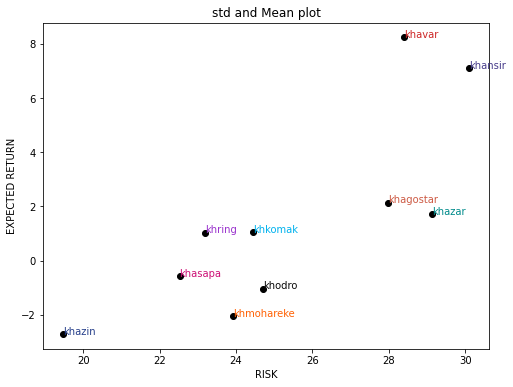

In [1238]:
plt.figure(figsize=(8,6))
for i in range(10):
    plt.plot(monthly_return_df[name_of_share[i]].std() ,monthly_return_df[name_of_share[i]].mean(),'o', color = 'black')
for i in range(10):
    plt.text(monthly_return_df[name_of_share[i]].std() ,monthly_return_df[name_of_share[i]].mean(),name_of_share[i],color = color_list[i])
plt.xlabel("RISK")
plt.ylabel("EXPECTED RETURN")
plt.title("std and Mean plot")

# Mean-Variance Optimization
## find the best weights for each shares 

In [847]:
def optimize_portfolio(returns, target_ret=None, short_sell=False):
    returns = returns.T.to_numpy()
    n, m = returns.shape
    weights = cp.Variable(n)
    sum_weights = cp.sum(weights)
    mu = returns.mean(axis=1)
    
    if target_ret is not None:
        target_return = cp.Parameter()
        target_return.value = target_ret
    
    cov_matrix = np.cov(returns)
    risk = cp.quad_form(weights, cov_matrix)
    objective = cp.Minimize(risk)
    
    limit_return = [weights.T@mu == target_return] if target_ret is not None else []
    short_avail = [weights >= 0] if not short_sell else []
    
    constraints = [sum_weights == 1]+short_avail+limit_return
    
    prob = cp.Problem(objective, constraints)
    prob.solve(solver=cp.ECOS)
    
    Er = weights.value@mu
    
    return np.round(weights.value,3), np.sqrt(risk.value), np.round(Er,3)

# Now, we have a optimal portfolio without Short Sell

In [1242]:
weights, risk, retuen_p = optimize_portfolio(monthly_return_df, 6.7)

table_w = [['Stock Name','wi']]
for i in range(10):
    table_w.append([name_of_share[i] ,weights[i]])
print(tabulate(table_w))

print("Optimal risk: ", round(risk,2))
print("Excpected return: ",retuen_p)

----------  -----
Stock Name  wi
khodro      0.0
khasapa     0.0
khagostar   0.186
khansir     0.356
khavar      0.458
khazin      0.0
khazar      0.0
khmohareke  0.0
khkomak     0.0
khring      0.0
----------  -----
Optimal risk:  15.54
Excpected return:  6.7


# Here, we have a optimal portfo with Short Sell

In [1172]:
weights, risk, retuen_p = optimize_portfolio(monthly_return_df ,6.7, short_sell=True)
print("Optimal risk: ", round(risk,2))
print("Excpected return: ",retuen_p)


table_w = [['Stock Name','wi']]
for i in range(10):
    table_w.append([name_of_share[i] ,weights[i]])
print(tabulate(table_w))

Optimal risk:  14.86
Excpected return:  6.7
----------  ------
Stock Name  wi
khodro      -0.163
khasapa     0.174
khagostar   0.261
khansir     0.387
khavar      0.425
khazin      -0.134
khazar      -0.021
khmohareke  0.187
khkomak     -0.014
kharing     -0.102
----------  ------


#  ***************Solution of Question 3*******************

## Ploting the Efficient frontier

Text(0, 0.5, 'Expected Return')

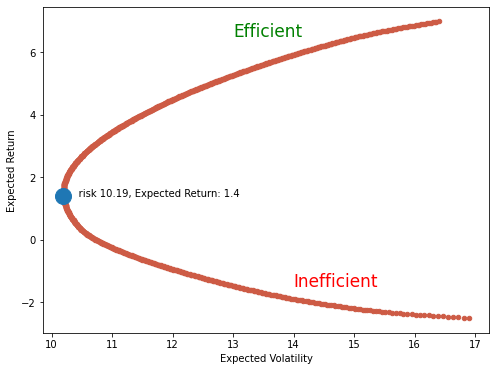

In [1258]:
portfolio_volatilities = []
portfolio_returns = []
for step in np.arange(-2.5, 7, 0.01):
    we , ris , exp_re = optimize_portfolio(monthly_return_df, step)
    portfolio_returns.append(round(exp_re,2))
    portfolio_volatilities.append(round(ris,2))
    
portfolios = pd.DataFrame({'Return': portfolio_returns, 'Volatility':portfolio_volatilities  })
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(8,6) , color = color_list[2])
plt.plot(min(portfolio_volatilities),portfolio_returns[portfolio_volatilities.index(min(portfolio_volatilities))],
         'o', markersize=16)
plt.text(min(portfolio_volatilities),portfolio_returns[portfolio_volatilities.index(min(portfolio_volatilities))],
         "     risk "+ str(min(portfolio_volatilities)) +", Expected Return: " 
         + str(portfolio_returns[portfolio_volatilities.index(min(portfolio_volatilities))]))

plt.text(13, 6.5, 'Efficient', size = 17 , color = 'green')
plt.text(14, -1.5, 'Inefficient', size = 17 , color = 'red')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return') 

# ***************Solution of Question 4*******************

## Drawing Transformation Line for Optimal portfolio, We need to two point:
## one point is (0, r) = (0 , 2)
## one poinr is (Risk(p) , Return(p))

(-8.0, 15.0)

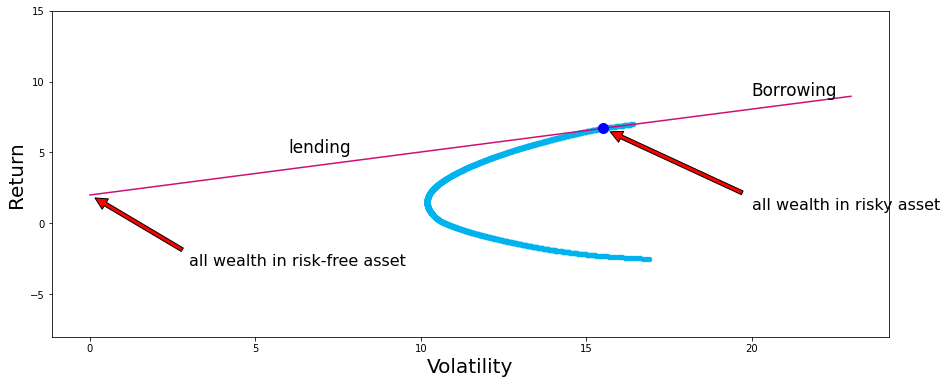

In [1263]:
portfolios = pd.DataFrame({'Return': portfolio_returns, 'Volatility':portfolio_volatilities  })
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(15,6) , color = color_list[8])
plt.plot([0,15.5,23],[2,6.7,8.96] , color = color_list[1] , markersize = 10 )
plt.plot([15.5],[6.7] , 'o' , color = 'b', markersize = 10 )
plt.annotate('all wealth in risky asset', xy=(15.5, 6.7), xytext=(20, 1),
            arrowprops=dict(facecolor='red', shrink=0.05), size=16)
plt.annotate('all wealth in risk-free asset', xy=(0, 2), xytext=(3, -3),
            arrowprops=dict(facecolor='red', shrink=0.05), size=16)
plt.xlabel("Volatility" , size = 20)
plt.ylabel("Return" , size = 20)
plt.text(6, 5, 'lending', size = 17)
plt.text(20, 9, 'Borrowing', size = 17)
plt.ylim(-8, 15)

## Part iii:
### If we want to borrow 50 percent of fund, must lending from risk-free asset, Now we can calculate risk and return of new portfolio (We get help from the Transformation line)
### in the next cell, the point of new Portfolio was shown

Text(16.5, 9, 'Borrowing')

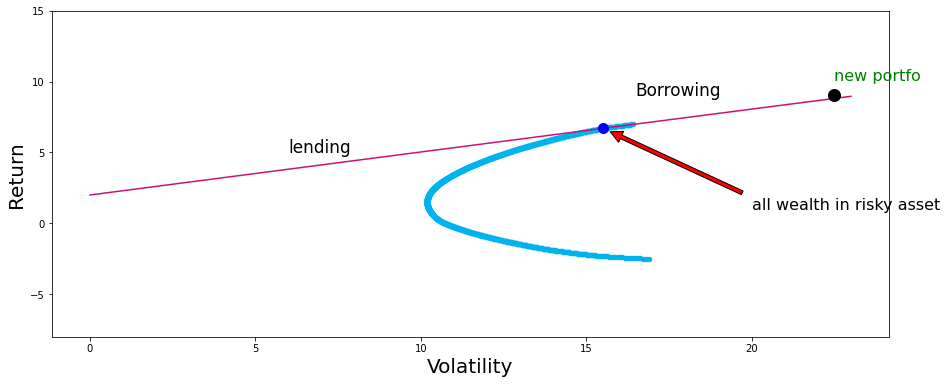

In [1264]:
new_ret = 1.50 * 6.7 - 0.50 * 2
new_risk = (new_ret - 2)*(15/4.7)

portfolios = pd.DataFrame({'Return': portfolio_returns, 'Volatility':portfolio_volatilities  })
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(15,6) , color = color_list[8])
plt.plot([0,15.5,23],[2,6.7,8.96] , color = color_list[1] , markersize = 10 )
plt.ylim(-8, 15)
plt.plot([15.5],[6.7] , 'o' , color = 'b', markersize = 10 )
plt.plot(new_risk ,new_ret, 'o' ,color = 'black', markersize = 12 )
plt.text(new_risk , new_ret+1, "new portfo" , size = 16 , color = 'green')
plt.annotate('all wealth in risky asset', xy=(15.5, 6.7), xytext=(20, 1),
            arrowprops=dict(facecolor='red', shrink=0.05), size=16)
plt.xlabel("Volatility" , size = 20)
plt.ylabel("Return" , size = 20)
plt.text(6, 5, 'lending', size = 17)
plt.text(16.5, 9, 'Borrowing', size = 17)

##  ***************Solution of Question 5*******************

### The best possible line is the line that passes through point (0,r) and is tangent to the curve, so we try to find this line

(-5.0, 9.0)

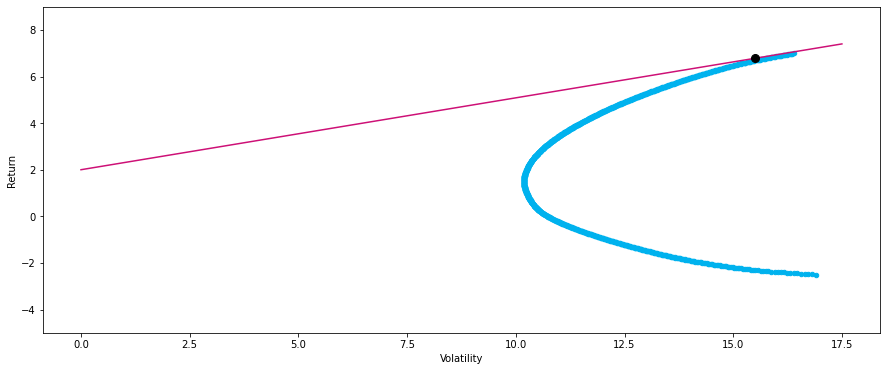

In [1059]:
portfolios = pd.DataFrame({'Return': portfolio_returns, 'Volatility':portfolio_volatilities  })
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(15,6) , color = color_list[8])
plt.plot([0,17.5],[2,7.4], color = color_list[1])
plt.plot([15.5],[6.8],'o' , color = 'black' , markersize = 8 )
plt.ylim(-5, 9)

# ***************Solution of Question 1*******************

##  we use  $ Bi = COV(R_m , R_i)/VAR(R_m)$ to calculat of Beta
## All of the data are monthly
## if $B_i = 1$ share is a neutral that means movment of share is as same as market
## if $B_i > 1$ share is a aggressive that means movment of share is faster than market
## if $B_i < 1$ share is a defensive  is slower than market

In [1269]:
market_return = list_of_monthly_market_return
list_of_beta = []
for i in range(10):
    x = list_of_monthly_return[i]
    y = market_return
    mean_x = sum(x) / len(x)
    mean_y = sum(y) / len(y)
    cov_shares_and_market = sum((a - mean_x) * (b - mean_y) for (a,b) in zip(x,y)) / len(x)
    B_i = round(cov_shares_and_market / np.var(market_return),2)
    list_of_beta.append(B_i)

## Type of shares

In [1271]:
for i in range(10):
    if list_of_beta[i]>1:     print(str(i+1)+":" ,name_of_share[i], "is aggressive stock becuase Beta is ",list_of_beta[i] )
    elif list_of_beta[i]<1 and list_of_beta[i]>0.1 :   print(str(i+1)+":" ,name_of_share[i],
                                                           "is defensive stock becuase Beta is",list_of_beta[i])
    else:                     print(str(i+1)+":" ,name_of_share[i], "is neutral stock becuase Beta is ", list_of_beta[i])

1: khodro is defensive stock becuase Beta is 0.29
2: khasapa is neutral stock becuase Beta is  -0.05
3: khagostar is defensive stock becuase Beta is 0.88
4: khansir is defensive stock becuase Beta is 0.2
5: khavar is neutral stock becuase Beta is  -0.41
6: khazin is neutral stock becuase Beta is  0.02
7: khazar is neutral stock becuase Beta is  0.06
8: khmohareke is aggressive stock becuase Beta is  1.08
9: khkomak is neutral stock becuase Beta is  -0.08
10: khring is defensive stock becuase Beta is 0.37


## Table of 'Standard Deviation' and  'Beta' for each share
### the result shows that Standard deviation changes are almost similar to beta changes

In [1274]:
table_std_beta = [['Stock Name', 'Standard Deviation', 'Beta']]
for i in range(10):
    table_std_beta.append([name_of_share[i] , list_of_std[i] , list_of_beta[i]])

In [1275]:
print(tabulate(table_std_beta))

----------  ------------------  -----
Stock Name  Standard Deviation  Beta
khodro      3.07                0.29
khasapa     3.09                -0.05
khagostar   3.33                0.88
khansir     3.18                0.2
khavar      2.64                -0.41
khazin      2.89                0.02
khazar      3.24                0.06
khmohareke  3.11                1.08
khkomak     2.9                 -0.08
khring      3.04                0.37
----------  ------------------  -----


# ***************Solution of Question 7*******************

## calculation monthly index of market
## consider r = mean of monthly index market

In [855]:
market_index_monthly = sum(list_of_monthly_market_return)/len(list_of_monthly_market_return)

## calculation sharpe ratio with $ (ER_i - r) / std(i) $ formula

In [856]:
list_of_sharpe_ratio = []
for i in range(10):
    shape_i = (monthly_return_df[name_of_share[i]].mean()- market_index_monthly)/ monthly_return_df[name_of_share[i]].std()
    list_of_sharpe_ratio.append(round(shape_i,3))

## calculation treynor ratio with $ (ER_i - r) / beta(i) $ formula

In [857]:
list_of_treynor_ratio = []
for i in range(10):
    treynor_i = (monthly_return_df[name_of_share[i]].mean()- market_index_monthly)/ list_of_beta [i]
    list_of_treynor_ratio.append(round(treynor_i,3))

## calculation alpha jensen with $ (ER_i - r) - Beta_i *(ER_m - r) $ formula

In [858]:
list_of_alpha_ratio = []
for i in range(10):
    alpha_i = ((monthly_return_df[name_of_share[i]].mean()- market_index_monthly))-list_of_beta[i]*(sum(market_return)/30 - market_index_monthly )
    list_of_alpha_ratio.append(round(alpha_i,3))

## Result

In [1277]:
table_SR_TR_Alpha = [['Stock Name', 'Sharpe Ratio', 'Treynor Ratio','Alpha Ratio']]
for i in range(10):
    table_SR_TR_Alpha.append([name_of_share[i] , list_of_sharpe_ratio[i] ,
                              list_of_treynor_ratio[i], list_of_alpha_ratio[i]])
print(tabulate(table_SR_TR_Alpha))

----------  ------------  -------------  -----------
Stock Name  Sharpe Ratio  Treynor Ratio  Alpha Ratio
khodro      -0.105        -8.959         -2.598
khasapa     -0.095        42.933         -2.147
khagostar   0.02          0.64           0.563
khansir     0.184         27.708         5.542
khavar      0.235         -16.276        6.673
khazin      -0.22         -213.8         -4.276
khazar      0.005         2.35           0.141
khmohareke  -0.151        -3.353         -3.621
khkomak     -0.021        6.492          -0.519
khring      -0.023        -1.464         -0.542
----------  ------------  -------------  -----------


# ***************Solution of Question 8*******************

## read inflation data and calculating of monthly rate of inflation

In [1159]:
inflation_df = pd.read_csv("Inflation.csv")
inflation_df['inflation'] = inflation_df['Price'].pct_change(1)*100

## ploting monthly Expected Return and monthly inflation rate

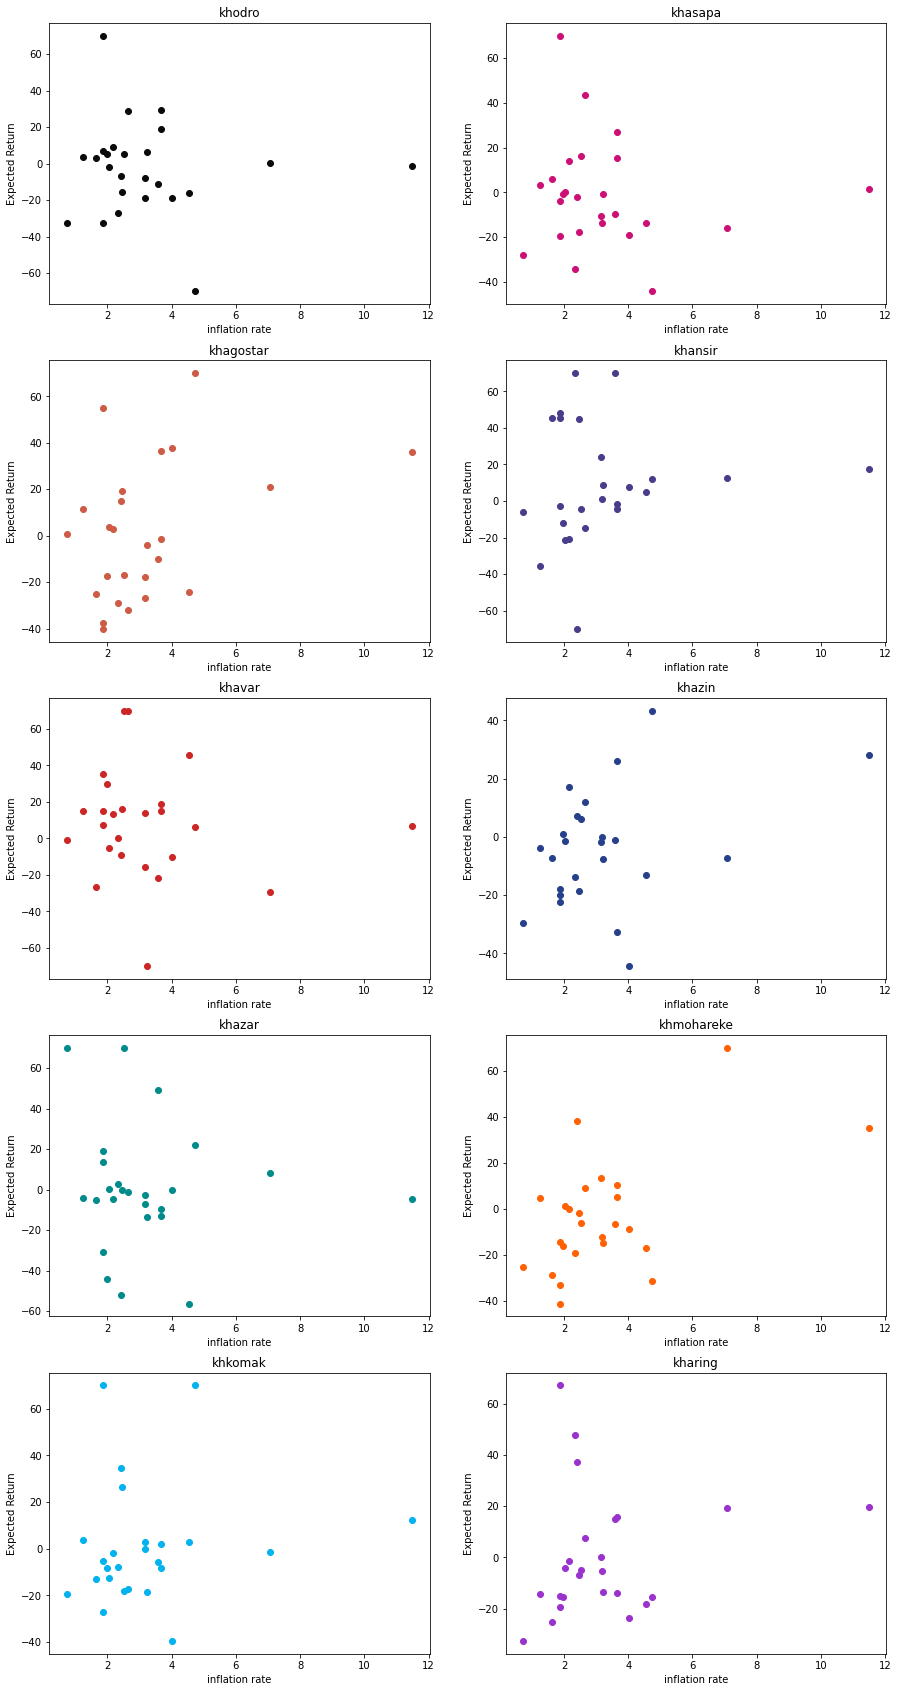

In [889]:
figure, axis = plt.subplots(5,2,figsize=(15, 30))
k=0
for i in range(5):
    for j in range(2):
        axis[i, j].plot(inflation_df['inflation'], monthly_return_df[name_of_share[k]][0:len(inflation_df)],'o', 
                        color = color_list[k])
        axis[i, j].set_title(name_of_share[k])
        axis[i,j].set_xlabel('inflation rate')
        axis[i,j].set_ylabel('Expected Return')
        k+=1
     
plt.show()

## Now, we fit a regression model on data

In [883]:
def find_regression(x,y):
    x = np.array(x).reshape((-1, 1))
    y = np.array(y)
    model = LinearRegression()
    model.fit(x, y)
    r_sq = model.score(x, y)
    return round(model.intercept_ ,3), round(model.coef_[0],3)

# result of regression on inflation rate and Expected Return
## in most of the shares, with the increase in the inflation rate, the share price also increases, and as a result, the Expected Return increases.

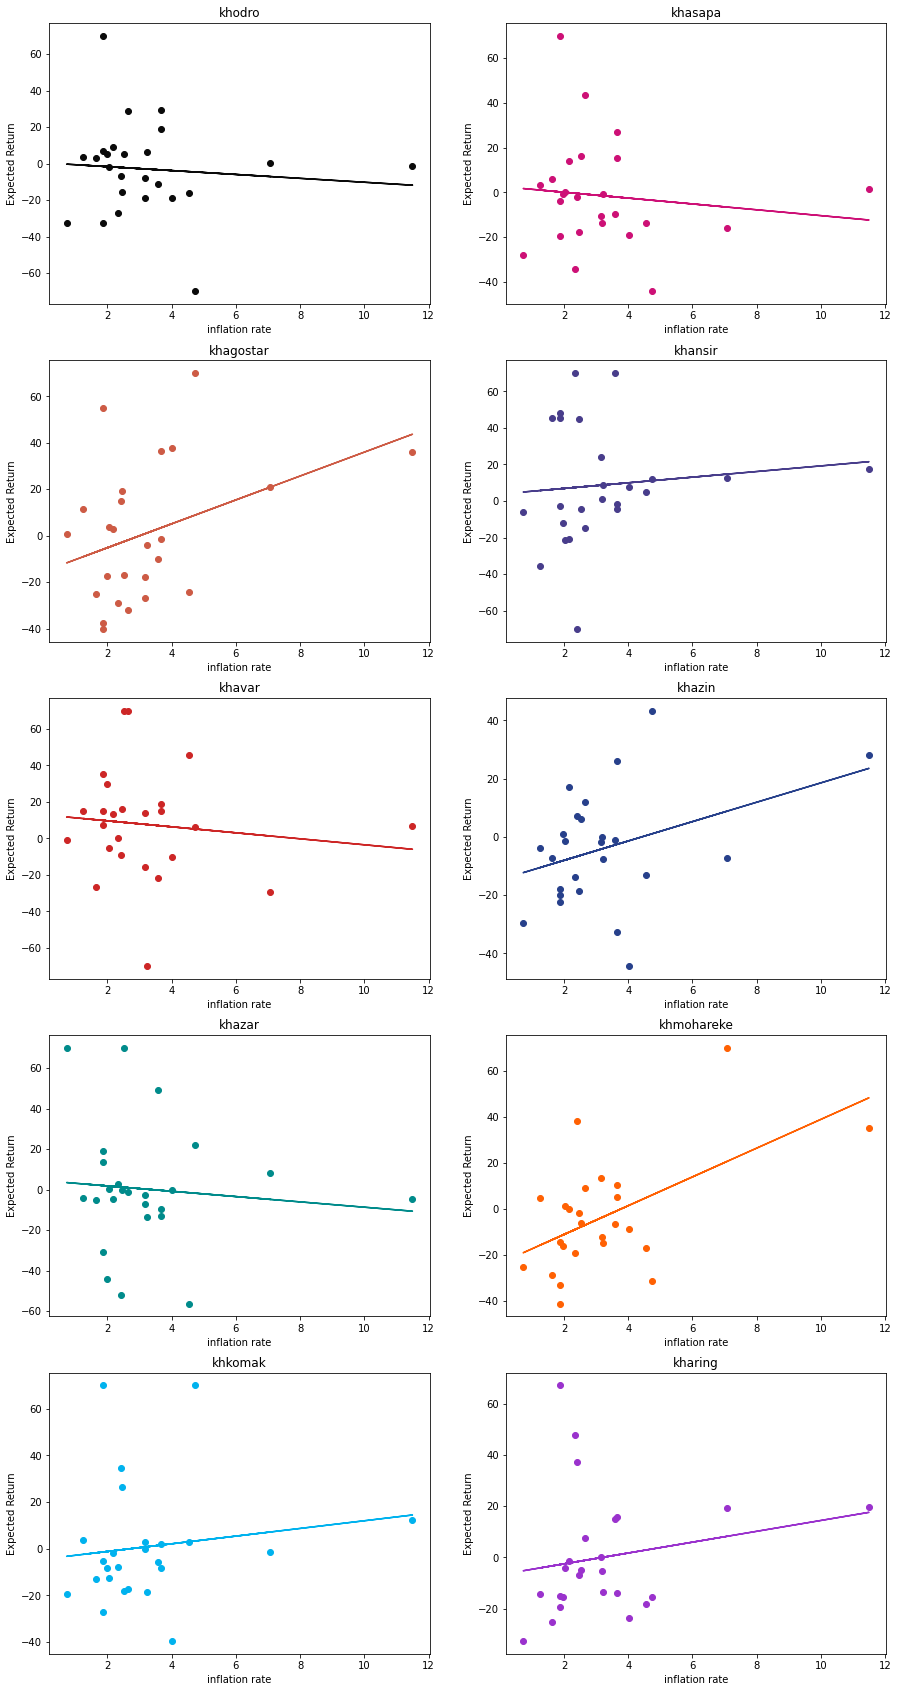

In [887]:
list_of_slope = []
figure, axis = plt.subplots(5,2,figsize=(15, 30))
k=0
for i in range(5):
    for j in range(2):
        intecept , slope = find_regression(inflation_df['inflation'][1::], monthly_return_df[name_of_share[k]][1:len(inflation_df)])
        list_of_slope.append(slope)
        axis[i, j].plot(inflation_df['inflation'], monthly_return_df[name_of_share[k]][0:len(inflation_df)],'o', 
                        color = color_list[k])
        abline_values = [slope * i +intecept for i in inflation_df['inflation'] ]

        axis[i, j].plot(inflation_df['inflation'], abline_values, color = color_list[k])
        axis[i, j].set_title(name_of_share[k])
        axis[i,j].set_xlabel('inflation rate')
        axis[i,j].set_ylabel('Expected Return')
        k+=1
     
plt.show()

# part c:

## Risk systematic is equal to Beta

## Calculation Risk non-systematic using $VAR^2(i) - B^2_i * VAR(m)$

In [1278]:
list_of_non_systematic = []
for i in range(10):
    non_sys_i = (np.var(list_of_monthly_return[i]) - ((list_of_beta[i]**2)*np.var(list_of_monthly_market_return)))/10**2
    list_of_non_systematic.append(round(non_sys_i,3))

## result

In [866]:
table_Risk= [['Stock Name', 'Systematic Risk', 'Non-Systematic Risk']]
for i in range(10):
    table_Risk.append([name_of_share[i] , list_of_beta[i] , list_of_non_systematic[i]])
print(tabulate(table_Risk))

----------  ---------------  -------------------
Stock Name  Systematic Risk  Non-Systematic Risk
khodro      0.29             5.766
khasapa     -0.05            4.9
khagostar   0.88             6.287
khansir     0.2              8.692
khavar      -0.41            7.514
khazin      0.02             3.666
khazar      0.06             8.194
khmohareke  1.08             3.607
khkomak     -0.08            5.768
kharing     0.37             4.971
----------  ---------------  -------------------


# ***************Solution of Question 9*******************

## in last question, we calculated the slope of each shares depended on inflation rate, Now for APT, we fit regression on slope and Return that was calculated in Question 8

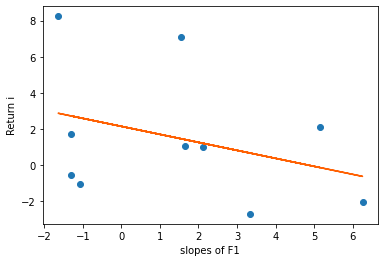

In [1280]:
plt.figure(figsize=(6,4))
plt.plot(list_of_slope, [round(monthly_return_df[name_of_share[i]].mean(),2) for i in range(10)], 'o')
intecept , s = find_regression(list_of_slope,[round(monthly_return_df[name_of_share[i]].mean(),2) for i in range(10)])
abline_values = [s * i +intecept  for i in list_of_slope]
plt.plot(list_of_slope, abline_values, color = color_list[7])
plt.xlabel('slopes of F1')
plt.ylabel('Return i')
plt.show()

#  ***************Solution of Question 10*******************

# At first, we are drawing the histogram plot of Daily returns for all asset

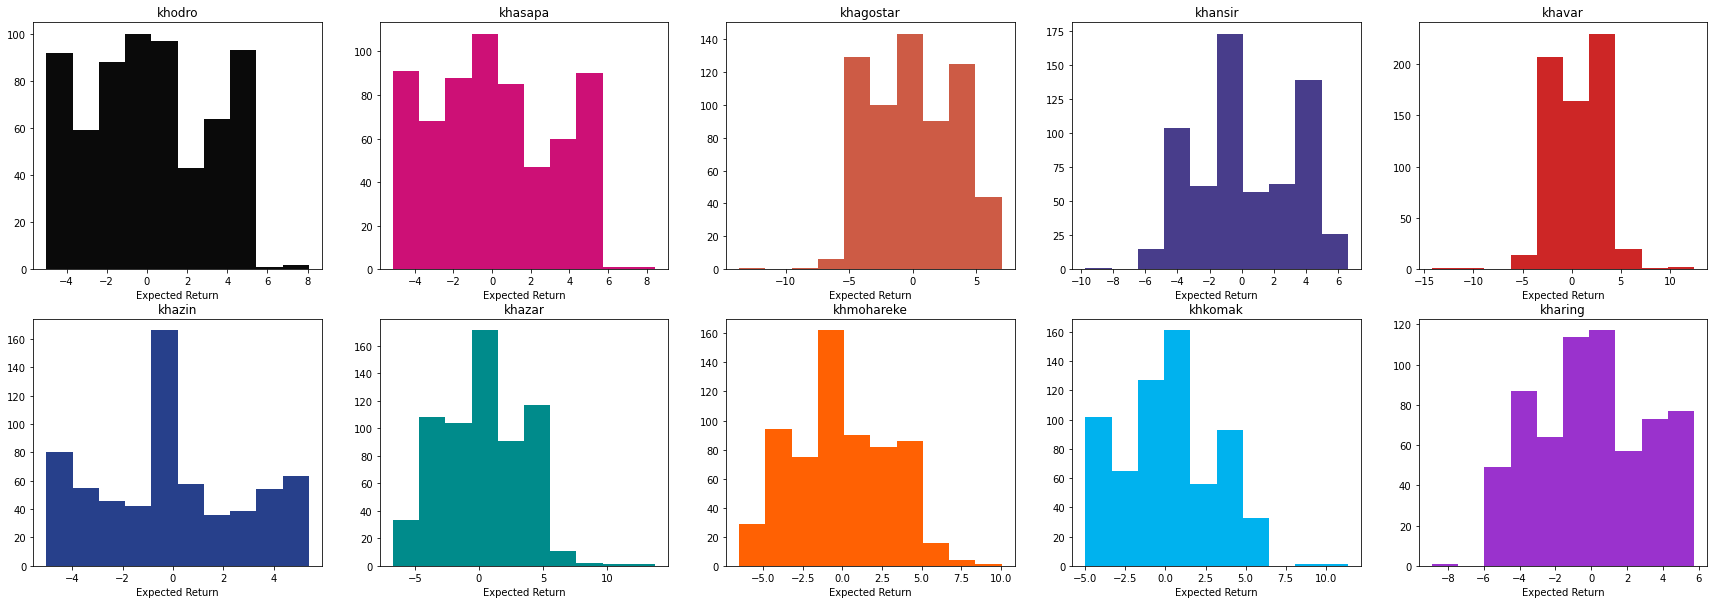

In [868]:
figure, axis = plt.subplots(2,5,figsize=(30, 10))
k=0
for i in range(2):
    for j in range(5):
        
        axis[i, j].hist(list_of_df[k]['DailyReturn'], color = color_list[k])
        axis[i,j].set_xlabel('Expected Return')
        axis[i,j].set_title(name_of_share[k])
        k+=1
     
plt.show()

## in historical method, we have just calculate the quantile 5 %

In [869]:
VaR_Historical = [['Stock Name', 'empirical quantile of daily returns (Historical)']]
for i in range(10):
    VaR_Historical.append([name_of_share[i] , round(list_of_df[i]['DailyReturn'].quantile(.05),2)])
print(tabulate(VaR_Historical))

----------  ------------------------------------------------
Stock Name  empirical quantile of daily returns (Historical)
khodro      -4.69
khasapa     -4.66
khagostar   -4.89
khansir     -4.59
khavar      -2.98
khazin      -4.55
khazar      -4.69
khmohareke  -4.81
khkomak     -4.47
kharing     -4.64
----------  ------------------------------------------------


## in Parametric method, we used mean , std and Z_score

In [1281]:
VaR_Parametric = [['Stock Name', 'empirical quantile of daily returns (Parametric)']]
list_of_VaR_parametric = []
Z_alpha = -1.64
for i in range(10):
    VaR_Parametric.append([name_of_share[i] ,round(list_of_mean[i] + list_of_std[i] * Z_alpha,3)])
    list_of_VaR_parametric.append(round(list_of_mean[i] + list_of_std[i] * Z_alpha,3))
print(tabulate(VaR_Parametric))

----------  ------------------------------------------------
Stock Name  empirical quantile of daily returns (Parametric)
khodro      -4.915
khasapa     -4.968
khagostar   -5.431
khansir     -4.835
khavar      -3.93
khazin      -4.79
khazar      -5.074
khmohareke  -5.11
khkomak     -4.666
khring      -4.996
----------  ------------------------------------------------


## in Mont carlo method, we generated 1000 random data with mu and sigma similar to real data, and calculate the quantile 5 % then caclulate mean of all of them

In [1282]:
list_of_VaR_shares = []
for i in range(10):
    VaR = 0
    for j in range(1000):
        generate_data = np.random.normal(list_of_mean[i], list_of_std[i], 640)
        VaR += round(np.quantile(generate_data,.05),5)
    list_of_VaR_shares.append(VaR/1000)

In [1283]:
VaR_Mont_Carlo = [['Stock Name', 'empirical quantile of daily returns (Mont Carlo)']]
for i in range(10):
    VaR_Mont_Carlo.append([name_of_share[i] , round(list_of_VaR_shares[i],3)])
print(tabulate(VaR_Mont_Carlo))

----------  ------------------------------------------------
Stock Name  empirical quantile of daily returns (Mont Carlo)
khodro      -4.914
khasapa     -4.962
khagostar   -5.43
khansir     -4.827
khavar      -3.923
khazin      -4.794
khazar      -5.057
khmohareke  -5.11
khkomak     -4.666
khring      -4.977
----------  ------------------------------------------------


## Table of VaR Historical, VaR Parametric ,  VaR Mont Carlo
## pay attention: We have to multiply the value of VaR by the amount of capital. but here, we don't know about amount of capital

In [1284]:
compare_VaR = [['Stock Name','Historical','Parametric', 'Mont Carlo']]
for i in range(10):
    compare_VaR.append([name_of_share[i] ,round(list_of_df[i]['DailyReturn'].quantile(.05),2)
                        ,round(list_of_mean[i] + list_of_std[i] * Z_alpha,3), round(list_of_VaR_shares[i],3)])
print(tabulate(compare_VaR))

----------  ----------  ----------  ----------
Stock Name  Historical  Parametric  Mont Carlo
khodro      -4.69       -4.915      -4.914
khasapa     -4.66       -4.968      -4.962
khagostar   -4.89       -5.431      -5.43
khansir     -4.59       -4.835      -4.827
khavar      -2.98       -3.93       -3.923
khazin      -4.55       -4.79       -4.794
khazar      -4.69       -5.074      -5.057
khmohareke  -4.81       -5.11       -5.11
khkomak     -4.47       -4.666      -4.666
khring      -4.64       -4.996      -4.977
----------  ----------  ----------  ----------


## In 95% of cases, the maximum amount of damage is equal to the VaR
## In monthly case, maximum 1 days, amount of damage is bigger than VaR

In [1286]:
VaR_monthly = [['Stock Name','Value At Risk (monthly)']]
for i in range(10):
    VaR_monthly.append([name_of_share[i] ,round(list_of_mean[i] + list_of_std[i] * Z_alpha * 10**6 * math.sqrt(22),1)])
print(tabulate(VaR_monthly))

----------  -----------------------
Stock Name  Value At Risk (monthly)
khodro      -23615305.1
khasapa     -23769150.8
khagostar   -25615298.5
khansir     -24461455.9
khavar      -20307623.7
khazin      -22230694.6
khazar      -24922992.9
khmohareke  -23922996.6
khkomak     -22307617.3
khring      -23384536.8
----------  -----------------------


## calculate VaR of Optimal portfo

In [875]:
varinace_opt_portfo = risk * Z_alpha

## At Frist we calculated the VAR of portfo using $ SUM(SUM(w_i*w_j*p*std(i)*std(j))$
## $$ i , j = 0, 1,....,N $$

In [1287]:
var_protfo = 0
for i in range(10):
    for j in range(10):
        var_protfo += weights[i] * weights[j]* monthly_return_df.corr()[name_of_share[j]][0]*monthly_return_df[name_of_share[i]].std()*monthly_return_df[name_of_share[j]].std()
        
VaR_Portfo_monthly = round(Z_alpha * math.sqrt(var_protfo),3) 
print("VaR of optimal portfo is", VaR_Portfo_monthly)

VaR of optimal portfo is -13.577


## we want to do backtesting, so we using binomial test 

In [1197]:
list_of_Pvalue = []
for i in range(10):
    pi = sum((list_of_df[i]['DailyReturn']<list_of_VaR_parametric[i]))
    p_value = round(binom_test(pi, len(list_of_df[i]['DailyReturn']) , 0.05, alternative='greater' ),6)
    list_of_Pvalue.append(p_value)

## result shows the VaR is a good model

In [1198]:
Pvalue_of_testing = [['Stock Name','P value of Binom Test','rate of fail' , 'result']]
for i in range(10):
    Pvalue_of_testing.append([name_of_share[i] ,list_of_Pvalue[i], 
                              str(sum((list_of_df[i]['DailyReturn']<list_of_VaR_parametric[i])))+"/640",
                              "H0 is Reject" if list_of_Pvalue[i]< 0.05 else "H0 is Non-Reject"])
print(tabulate(Pvalue_of_testing))

----------  ---------------------  ------------  ----------------
Stock Name  P value of Binom Test  rate of fail  result
khodro      0.999999               10/640        H0 is Non-Reject
khasapa     1.0                    6/640         H0 is Non-Reject
khagostar   1.0                    8/640         H0 is Non-Reject
khansir     0.999484               16/640        H0 is Non-Reject
khavar      0.999966               13/640        H0 is Non-Reject
khazin      0.999484               16/640        H0 is Non-Reject
khazar      0.999966               13/640        H0 is Non-Reject
khmohareke  0.999988               12/640        H0 is Non-Reject
khkomak     0.976735               22/640        H0 is Non-Reject
kharing     1.0                    1/640         H0 is Non-Reject
----------  ---------------------  ------------  ----------------


# END